<a href="https://colab.research.google.com/github/SunnyShrestha-repo/C-Practice/blob/fileUpload/FinalProject_intro2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linking Drive to this Collab Notebook

In [2]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

Drive not mounted, so nothing to flush and unmount.
All changes made in this colab session should now be visible in Drive.


In [3]:
##### ROOT FOR GOOGLE DRIVE#####
google_drive_root='IntroToAI'

In [4]:
google_drive_mount_location = '/content/drive'
data_file=google_drive_mount_location + '/My Drive/Colab Notebooks/' + google_drive_root + '/'

In [5]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


In [6]:
data_file

'/content/drive/My Drive/Colab Notebooks/IntroToAI/'

# ALL IMPORTS

In [7]:
import pandas as pd
import numpy as np
import pickle
# Important imports for libraries that will be used later on
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, GridSearchCV

# from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# DATA TO USE

Information about data from:

https://archive.ics.uci.edu/dataset/320/student+performance

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2-  5th to 9th grade, 3 - secondary education or 4 - higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - $<$ 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - $>$ 1 hour)

14 studytime - weekly study time (numeric: 1 - $<$2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - $>$10 hours)
15 failures - number of past class failures (numeric: n if 1$<$=n$<$3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)


In [9]:
file = data_file + "student-por.csv"
file

'/content/drive/My Drive/Colab Notebooks/IntroToAI/student-por.csv'

In [10]:
full_data = pd.read_csv(file)
full_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [ ]:
full_data.shape

(649, 33)

In [ ]:
full_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
full_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [ ]:
print(full_data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
print(full_data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

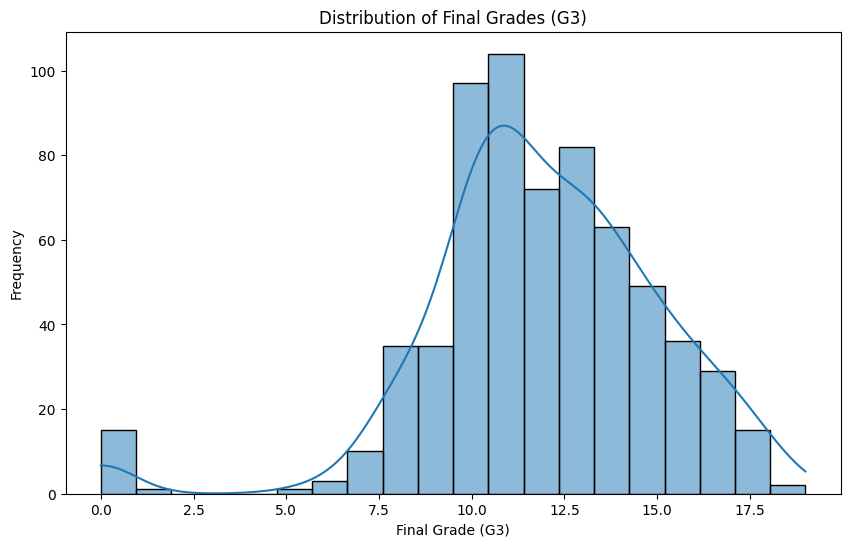

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(full_data['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# full_data.fillna(full_data.mean(), inplace=True)

<ipython-input-56-6c85d781dd61>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_data.fillna(full_data.mean(), inplace=True)


In [ ]:
# full_data.fillna(full_data.mean(numeric_only=True), inplace=True)

In [ ]:
print(full_data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


#DATA PREPROCESS

LabelEncoder to encode categorical data
In this dataset's case Credit column

In [ ]:
# le = LabelEncoder()

In [ ]:
#school, sex, address, famsize, pstatus, mjob, fjob, reason, guardian,

In [11]:
# categorical_columns = ['school_ms', 'sex_m', 'address_u', 'famsize_le3', 'pstatus_t',
#                         'mjob_health', 'mjob_other', 'mjob_services', 'mjob_teacher',
#                         'fjob_health', 'fjob_other', 'fjob_services', 'fjob_teacher',
#                         'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
#                         'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
#                         'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
#                         'romantic_yes']

categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]

In [12]:
df_encoded = pd.get_dummies(full_data, columns=categorical_columns, drop_first=True)

In [13]:
df_encoded.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [14]:
df_encoded.shape

(649, 42)

In [15]:
df_encoded.columns = df_encoded.columns.str.lower()


In [16]:
scaler = StandardScaler()
df_encoded[['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']] = scaler.fit_transform(df_encoded[['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']])


In [ ]:
df_encoded.columns

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2',
       'g3', 'school_ms', 'sex_m', 'address_u', 'famsize_le3', 'pstatus_t',
       'mjob_health', 'mjob_other', 'mjob_services', 'mjob_teacher',
       'fjob_health', 'fjob_other', 'fjob_services', 'fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
df_encoded.shape

(649, 42)

In [17]:
df_encoded

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1,0,1,0,0,0,1,1,0,0
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,0,0,0,1,0,0,0,1,1,0
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,1,0,1,0,0,0,1,1,1,0
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,1,0,0,1,0,1,1,1,1,1
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,1.119748,0.780478,-1.008546,-0.543555,...,1,0,0,0,0,1,0,1,1,0
645,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1,0,0,1,0,0,1,1,1,0
646,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,-3.068820,-2.075896,-1.859711,-0.543555,...,1,0,0,0,0,1,1,1,0,0
647,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,-2.021678,0.780478,1.544950,1.620662,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
df_encoded.columns

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2',
       'g3', 'school_ms', 'sex_m', 'address_u', 'famsize_le3', 'pstatus_t',
       'mjob_health', 'mjob_other', 'mjob_services', 'mjob_teacher',
       'fjob_health', 'fjob_other', 'fjob_services', 'fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
new_categorical_columns = ['school_ms', 'sex_m', 'address_u', 'famsize_le3', 'pstatus_t',
                        'mjob_health', 'mjob_other', 'mjob_services', 'mjob_teacher',
                        'fjob_health', 'fjob_other', 'fjob_services', 'fjob_teacher',
                        'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
                        'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
                        'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
                        'romantic_yes']

In [ ]:
df = full_data

In [ ]:
for column in new_categorical_columns:
    print(df_encoded[column].value_counts())

0    423
1    226
Name: school_ms, dtype: int64
0    383
1    266
Name: sex_m, dtype: int64
1    452
0    197
Name: address_u, dtype: int64
0    457
1    192
Name: famsize_le3, dtype: int64
1    569
0     80
Name: pstatus_t, dtype: int64
0    601
1     48
Name: mjob_health, dtype: int64
0    391
1    258
Name: mjob_other, dtype: int64
0    513
1    136
Name: mjob_services, dtype: int64
0    577
1     72
Name: mjob_teacher, dtype: int64
0    626
1     23
Name: fjob_health, dtype: int64
1    367
0    282
Name: fjob_other, dtype: int64
0    468
1    181
Name: fjob_services, dtype: int64
0    613
1     36
Name: fjob_teacher, dtype: int64
0    500
1    149
Name: reason_home, dtype: int64
0    577
1     72
Name: reason_other, dtype: int64
0    506
1    143
Name: reason_reputation, dtype: int64
1    455
0    194
Name: guardian_mother, dtype: int64
0    608
1     41
Name: guardian_other, dtype: int64
0    581
1     68
Name: schoolsup_yes, dtype: int64
1    398
0    251
Name: famsup_yes, dtype:

#Feature Selection

In [18]:
correlation_matrix = df_encoded.corr()
correlation_with_target = correlation_matrix['g3'].sort_values(ascending=False)
correlation_with_target

g3                   1.000000
g2                   0.918548
g1                   0.826387
higher_yes           0.332172
studytime            0.249789
medu                 0.240151
fedu                 0.211800
reason_reputation    0.170944
address_u            0.167637
internet_yes         0.150025
mjob_teacher         0.134910
fjob_teacher         0.125916
mjob_health          0.101244
famrel               0.063361
activities_yes       0.059791
famsup_yes           0.059206
reason_home          0.046537
famsize_le3          0.045016
fjob_health          0.039142
mjob_services        0.038447
nursery_yes          0.028752
pstatus_t           -0.000754
guardian_mother     -0.004415
fjob_other          -0.005301
fjob_services       -0.053204
paid_yes            -0.054898
mjob_other          -0.059251
schoolsup_yes       -0.066405
guardian_other      -0.080729
goout               -0.087641
romantic_yes        -0.090583
absences            -0.091379
health              -0.098851
age       

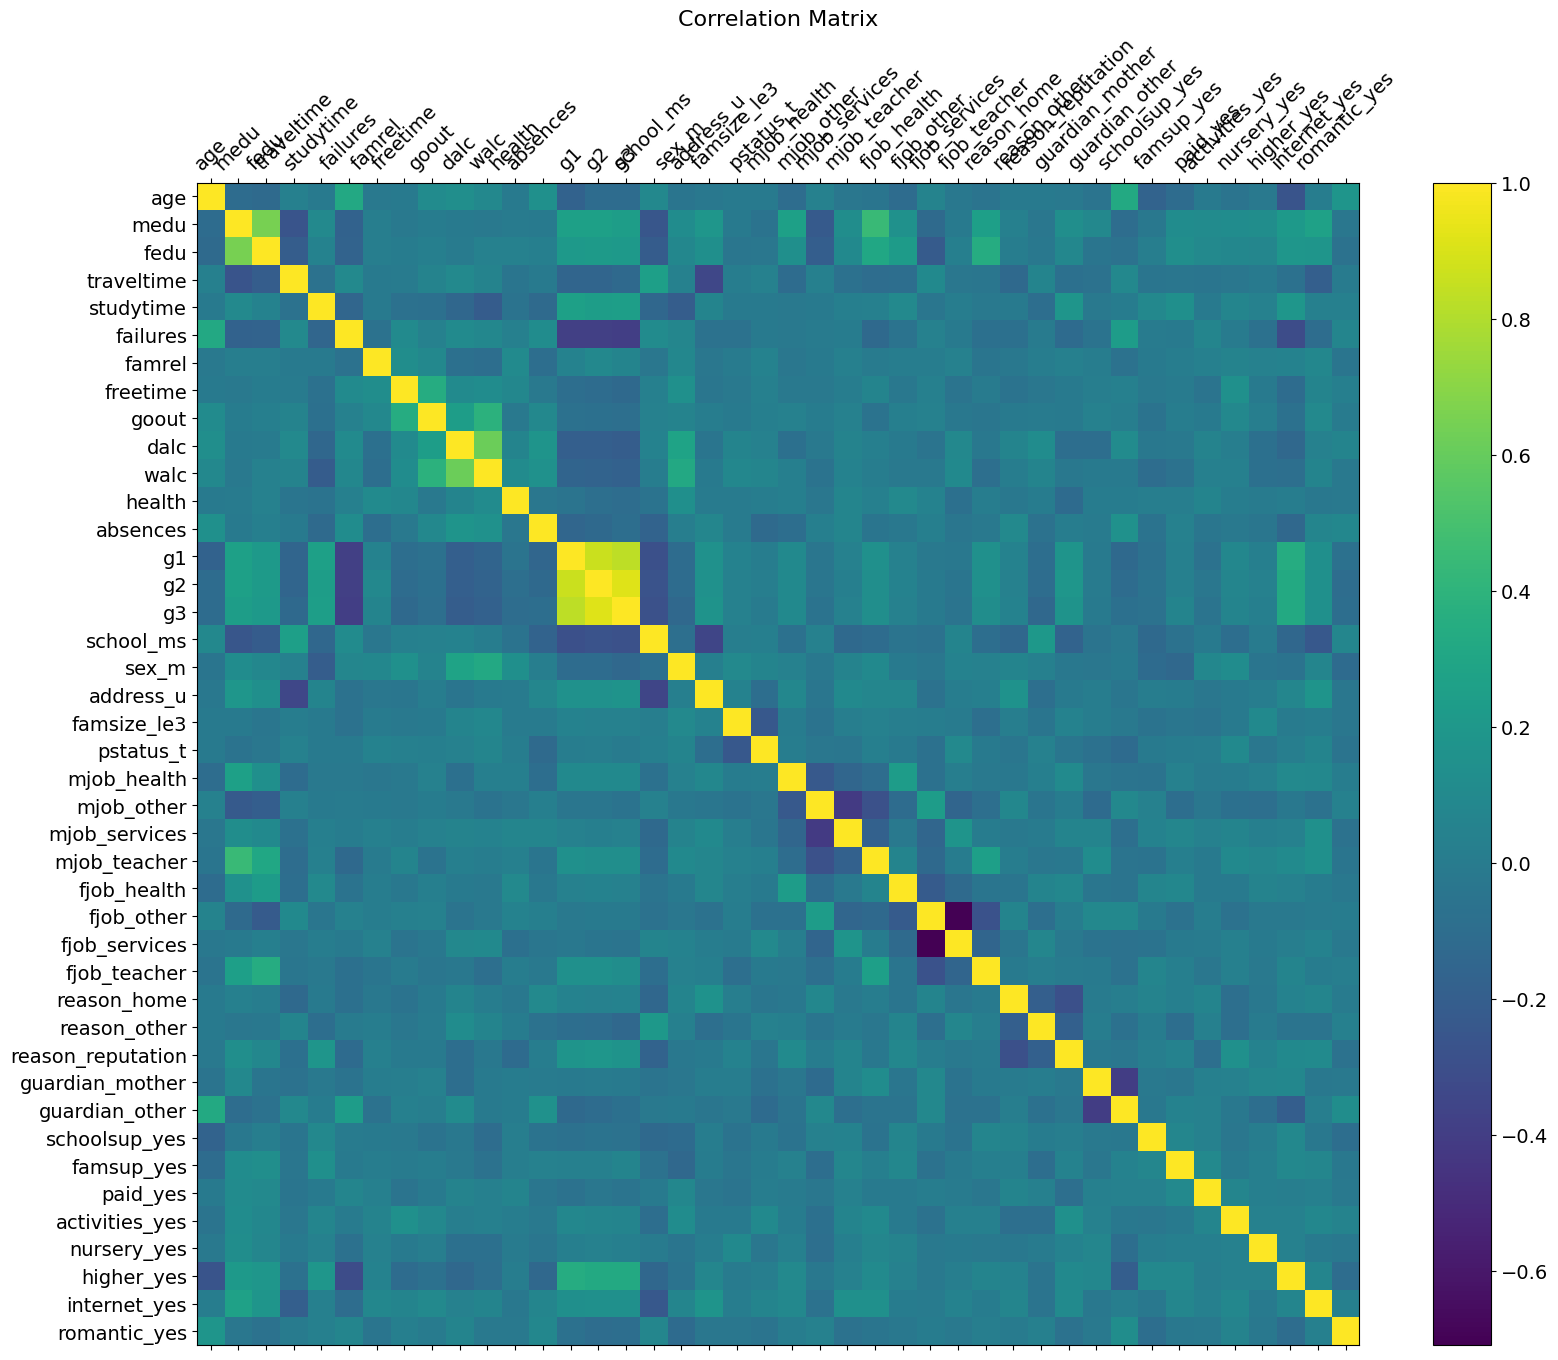

In [19]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_encoded.corr(), fignum=f.number)
plt.xticks(range(df_encoded.select_dtypes(['number']).shape[1]), df_encoded.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_encoded.select_dtypes(['number']).shape[1]), df_encoded.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [20]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

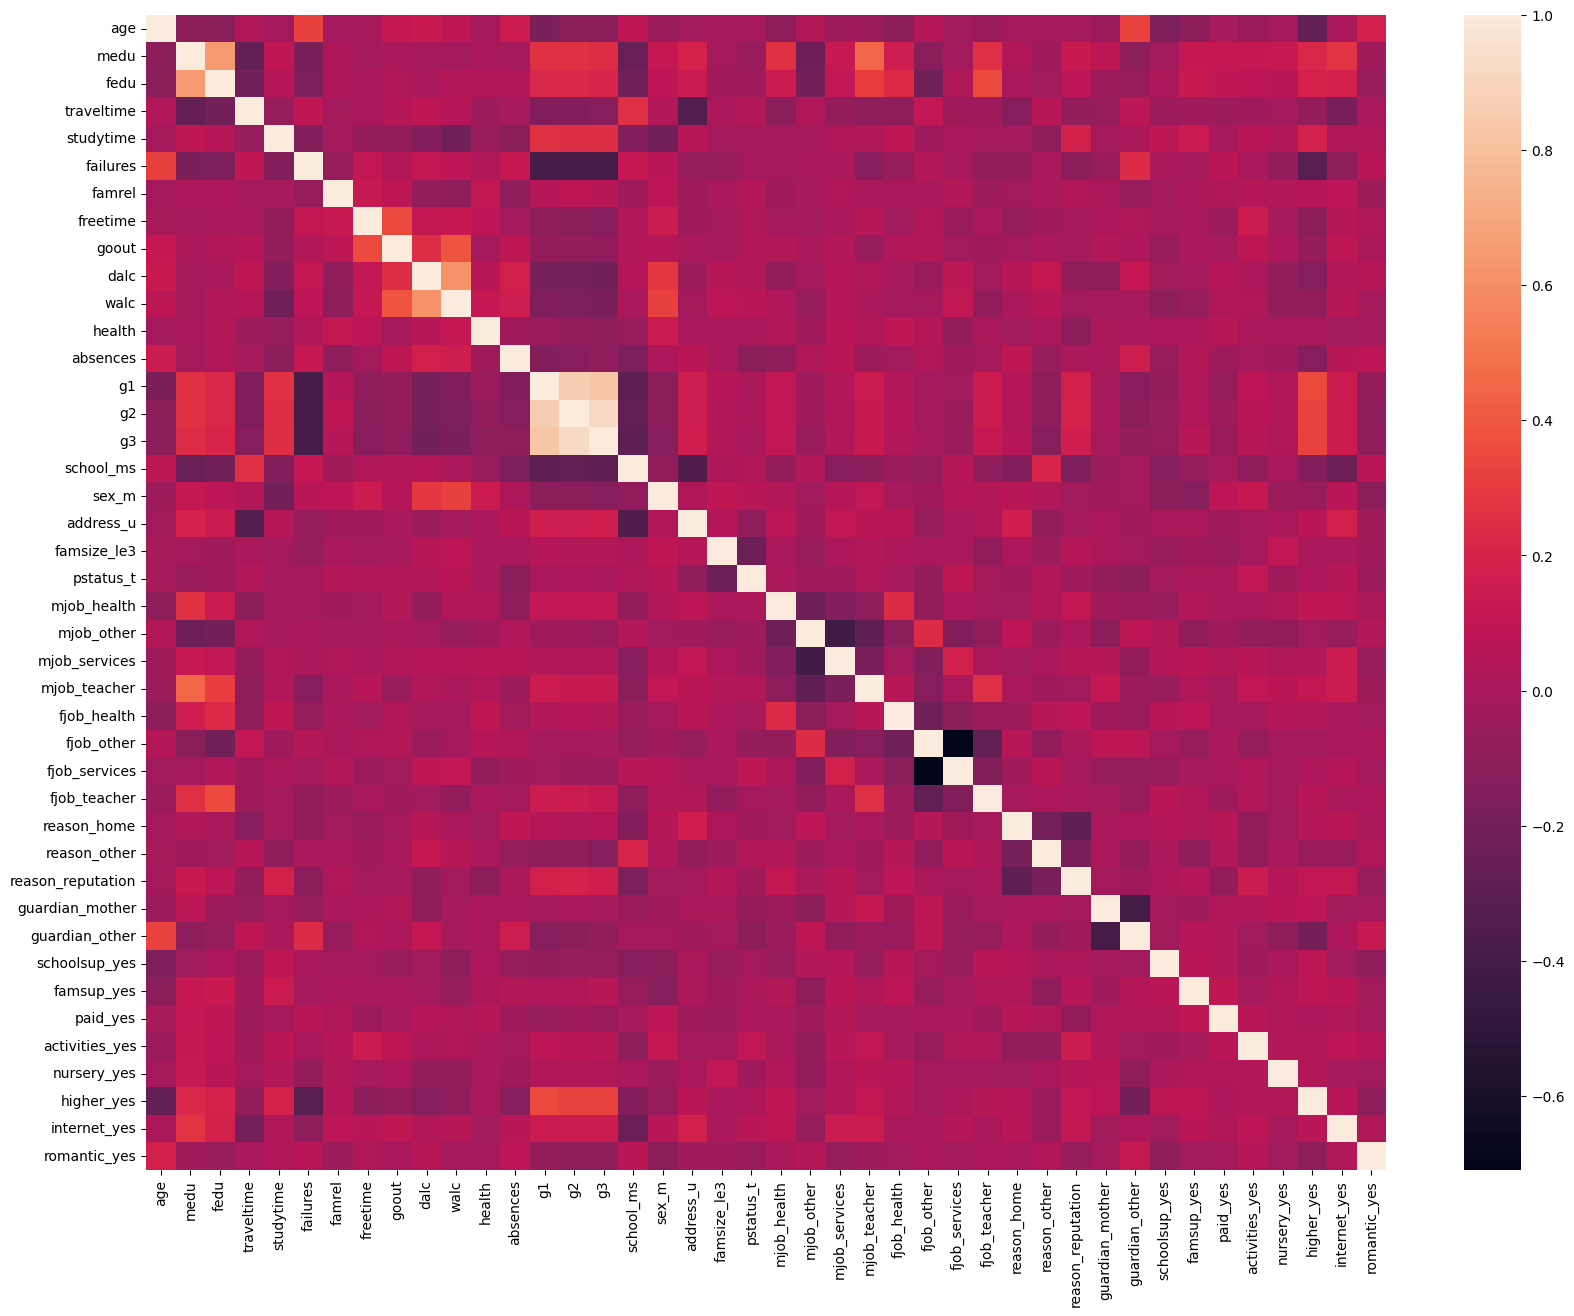

In [21]:
plt.subplots(figsize=(20,15))
svm = sns.heatmap(correlation_matrix)

In [22]:
figure = svm.get_figure()
figure.savefig(data_file+'correlation_heatmap.png', dpi=300)

<Axes: >

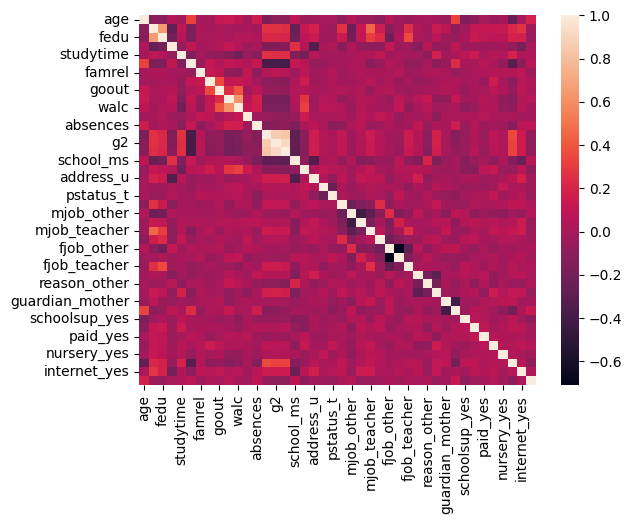

Random Forest for feature selection

In [ ]:
df_encoded.columns

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2',
       'g3', 'school_ms', 'sex_m', 'address_u', 'famsize_le3', 'pstatus_t',
       'mjob_health', 'mjob_other', 'mjob_services', 'mjob_teacher',
       'fjob_health', 'fjob_other', 'fjob_services', 'fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [23]:
X = df_encoded.drop('g3', axis=1)  # Features
y = df_encoded['g3']  # Target variable

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
feat_labels = df_encoded.columns[df_encoded.columns != 'g3']
feat_labels

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2',
       'school_ms', 'sex_m', 'address_u', 'famsize_le3', 'pstatus_t',
       'mjob_health', 'mjob_other', 'mjob_services', 'mjob_teacher',
       'fjob_health', 'fjob_other', 'fjob_services', 'fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

# df_income2= df_income.loc[:, df_income.columns != 'income']


reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_tr, y_tr)
importances = reg.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_tr.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_tr.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_tr.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_tr.shape[1]])
plt.tight_layout()
# plt.savefig(google_file_prefix + 'featureSelectionWCountries', dpi=300)
plt.show()

NameError: ignored

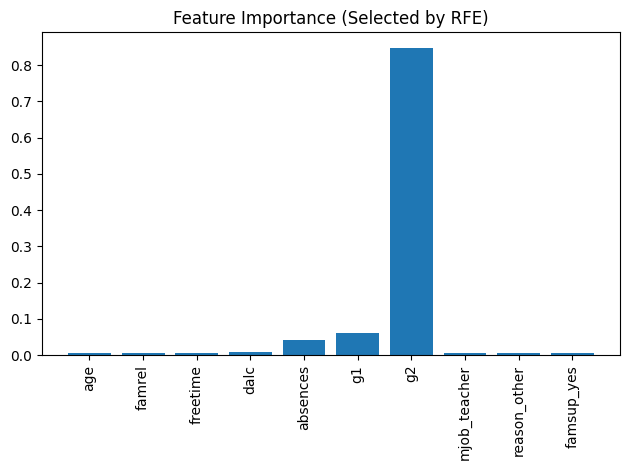

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the regressor
reg = GradientBoostingRegressor(random_state=0)

# Initialize RFE with the regressor and desired number of features
num_features_to_select = 10  # Adjust this based on your needs
rfe = RFE(reg, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X_tr, y_tr)

# Select the features chosen by RFE
selected_features = X_tr.columns[rfe.support_]

# Fit a new GradientBoostingRegressor on the selected features
reg_selected = GradientBoostingRegressor(random_state=0)
reg_selected.fit(X_tr[selected_features], y_tr)

# Get the feature importances from the newly fitted regressor
importances_selected = reg_selected.feature_importances_

# Plotting the feature importance
plt.title('Feature Importance (Selected by RFE)')
plt.bar(range(len(importances_selected)), importances_selected, align='center')
plt.xticks(range(len(importances_selected)), selected_features, rotation=90)
plt.tight_layout()
plt.show()



#MODEL USING SELECTED FEATURE

In [25]:
selected_features = ['g1', 'g2', 'freetime', 'famrel', 'dalc', 'absences', 'reason_other', 'famsup_yes', 'mjob_teacher']
df_selected = df_encoded[selected_features + ['g3']]

In [26]:
X = df_selected.drop('g3', axis=1)  # Features
y = df_selected['g3']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='linear'))  # Linear activation for regression

  model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression tasks
  return model

AttributeError: ignored

In [ ]:
# import numpy as np
# from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_losses = []
val_losses = []

fold_no = 1
for train_index, test_index in kf.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

    # Create and fit the model
    model = create_model()
    # model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # Adjust epochs, batch_size as needed
    history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=32, verbose=1)

    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Evaluate the model
    scores = model.evaluate(X_valid, y_valid, verbose=1)
    print(f'Score for fold {fold_no}: {model.metrics_names} of {scores}%')
    fold_no += 1


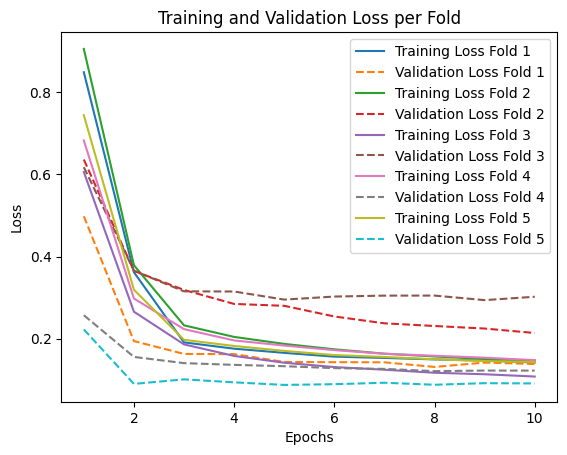

In [ ]:
epochs = range(1, 11)  # Adjust based on your number of epochs

# Plot training and validation loss for each fold
for i in range(k):
    plt.plot(epochs, train_losses[i], label=f'Training Loss Fold {i+1}')
    plt.plot(epochs, val_losses[i], label=f'Validation Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error

#OLD MODEL W/O FEATURE SELECTION

In [ ]:
selected_features = ['g1', 'g2', 'studytime', 'failures', 'sex_m', 'higher_yes', 'medu', 'famrel', 'internet_yes', 'mjob_teacher']
df_selected = df_encoded[selected_features + ['g3']]


In [ ]:
df_encoded[selected_features]


,g1,g2,studytime,failures,sex_m,higher_yes,medu,famrel,internet_yes,mjob_teacher
0,-4.155470,-0.195820,0.083653,-0.374305,0,1,1.310216,0.072606,0,0
1,-0.874570,-0.195820,0.083653,-0.374305,0,1,-1.336039,1.119748,1,0
2,0.219064,0.491137,0.083653,-0.374305,0,1,-1.336039,0.072606,1,0
3,0.948153,0.834615,1.290114,-0.374305,0,1,1.310216,-0.974536,1,0
4,-0.145481,0.491137,0.083653,-0.374305,0,1,0.428131,0.072606,0,0
...,...,...,...,...,...,...,...,...,...,...
644,-0.510025,-0.195820,1.290114,1.312667,0,1,-0.453954,1.119748,1,0
645,1.312697,1.178093,0.083653,-0.374305,0,1,0.428131,0.072606,1,1
646,-0.145481,0.147659,0.083653,-0.374305,0,1,-1.336039,-3.068820,0,0
647,-0.510025,-0.539298,-1.122808,-0.374305,1,1,0.428131,-2.021678,1,0


In [ ]:
X = df_selected.drop('g3', axis=1)  # Features
y = df_selected['g3']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (415, 10)
X_test shape: (130, 10)
y_train shape: (415,)
y_test shape: (130,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='linear'))  # Linear activation for regression

  model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression tasks
  return model

AttributeError: ignored

In [ ]:
model = create_model()
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 1.1055 - val_loss: 0.6543
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5175 - val_loss: 0.3047
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3239 - val_loss: 0.2359
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2451 - val_loss: 0.2002
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2107 - val_loss: 0.1820
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1940 - val_loss: 0.1766
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1821 - val_loss: 0.1762
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1735 - val_loss: 0.1753
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1672 - val_loss: 0.1722
Epoch 10/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1610 - val_loss: 0.1717
Epoch 11/50
13/13 

In [ ]:
# import numpy as np
# from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_losses = []
val_losses = []

fold_no = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and fit the model
    model = create_model()
    # model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # Adjust epochs, batch_size as needed
    history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=32, verbose=1)

    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Evaluate the model
    scores = model.evaluate(X_valid, y_valid, verbose=1)
    print(f'Score for fold {fold_no}: {model.metrics_names} of {scores}%')
    fold_no += 1


Epoch 1/10
17/17 [==============================] - 1s 15ms/step - loss: 0.5648 - val_loss: 0.2188
Epoch 2/10
17/17 [==============================] - 0s 4ms/step - loss: 0.2576 - val_loss: 0.1379
Epoch 3/10
17/17 [==============================] - 0s 6ms/step - loss: 0.1849 - val_loss: 0.1291
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 0.1720 - val_loss: 0.1182
Epoch 5/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1606 - val_loss: 0.1122
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.1529 - val_loss: 0.1048
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1499 - val_loss: 0.1025
Epoch 8/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1462 - val_loss: 0.0988
Epoch 9/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1469 - val_loss: 0.0996
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0960
Score for fold 1: ['loss'] of 0.0959815

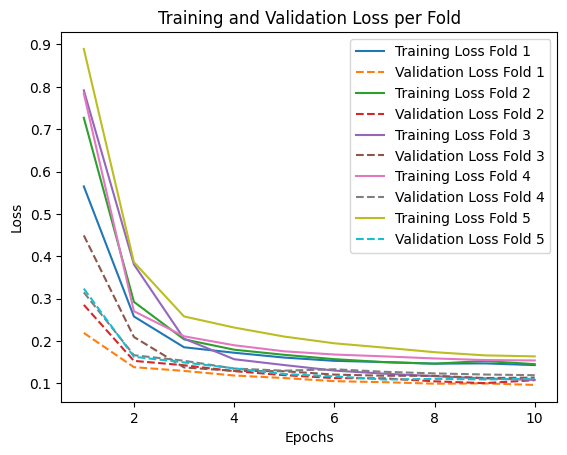

In [ ]:
epochs = range(1, 11)  # Adjust based on your number of epochs

# Plot training and validation loss for each fold
for i in range(k):
    plt.plot(epochs, train_losses[i], label=f'Training Loss Fold {i+1}')
    plt.plot(epochs, val_losses[i], label=f'Validation Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error

In [ ]:
X_train, X_test, y_train, y_test

In [ ]:
X_test.shape

(129, 13)

In [ ]:
y_test.shape

(129, 2)

In [ ]:
y_test

,g3,g3
1,11,-0.280658
4,13,0.338889
13,13,0.338889
14,15,0.958436
20,14,0.648663
...,...,...
614,12,0.029116
631,12,0.029116
633,14,0.648663
643,10,-0.590431


#DONT RUN

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

5/5 [==============================] - 0s 3ms/step
Mean Squared Error: 0.12233654036192153
R-squared: 0.8692664787395625


#HYPERPARAMETER TUNING

In [28]:
!pip install tensorflow keras keras-tuner --upgrade


In [29]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(hp):
    model = Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu', input_dim=X_train.shape[1]))

    # You can also tune the number of layers and units in each layer
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))

    model.add(Dense(1, activation='linear'))  # Output layer for regression

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error')

    return model


In [30]:
tuner = kt.RandomSearch(
    create_model,
    objective='val_loss',  # Objective to optimize (validation loss in this case)
    max_trials=10,         # Total number of trials to test
    executions_per_trial=1,
    directory='my_dir',    # Directory to store the tuning results
    project_name='ann_tuning'
)

# Perform hyperparameter search
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_valid, y_valid))



Trial 10 Complete [00h 00m 04s]
val_loss: 0.1110830157995224

Best val_loss So Far: 0.10044589638710022
Total elapsed time: 00h 00m 47s


In [32]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))


Epoch 1/50
13/13 [==============================] - 1s 16ms/step - loss: 0.5586 - val_loss: 0.1238
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2115 - val_loss: 0.1530
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1853 - val_loss: 0.1246
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1605 - val_loss: 0.1192
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1474 - val_loss: 0.1214
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1418 - val_loss: 0.1273
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1381 - val_loss: 0.1243
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1381 - val_loss: 0.1213
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 0.1315 - val_loss: 0.1247
Epoch 10/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1326 - val_loss: 0.1230
Epoch 11/50
13/13 

In [33]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print("Best Hyperparameters:")
print(f" - Units: {best_hps.get('units')}")
for i in range(best_hps.get('num_layers')):
    print(f" - Units in layer {i}: {best_hps.get('units_' + str(i))}")
print(f" - Learning Rate: {best_hps.get('learning_rate')}")

Best Hyperparameters:
 - Units: 64
 - Units in layer 0: 288
 - Learning Rate: 0.001


In [34]:
tuner.results_summary()

Results summary
Results in my_dir/ann_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 07 summary
Hyperparameters:
units: 64
num_layers: 1
units_0: 288
learning_rate: 0.001
units_1: 480
units_2: 384
Score: 0.10044589638710022

Trial 02 summary
Hyperparameters:
units: 320
num_layers: 2
units_0: 448
learning_rate: 0.01
units_1: 256
Score: 0.10224824398756027

Trial 03 summary
Hyperparameters:
units: 512
num_layers: 1
units_0: 320
learning_rate: 0.01
units_1: 128
Score: 0.105750173330307

Trial 00 summary
Hyperparameters:
units: 192
num_layers: 2
units_0: 192
learning_rate: 0.001
units_1: 32
Score: 0.10832921415567398

Trial 06 summary
Hyperparameters:
units: 448
num_layers: 3
units_0: 384
learning_rate: 0.001
units_1: 288
units_2: 160
Score: 0.10973214358091354

Trial 09 summary
Hyperparameters:
units: 96
num_layers: 1
units_0: 128
learning_rate: 0.01
units_1: 480
units_2: 128
Score: 0.1110830157995224

Trial 05 summary
Hyperparameters:
units: 416
num_laye

#Final Model

In [35]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


In [36]:
# Evaluate the model on test data
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

5/5 [==============================] - 0s 3ms/step - loss: 0.1554
Test Loss: 0.15544544160366058


In [37]:
# Make predictions
predictions = best_model.predict(X_test)

# You can further process 'predictions' as needed, depending on your task

5/5 [==============================] - 0s 2ms/step


In [42]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

5/5 [==============================] - 0s 3ms/step
Mean Squared Error: 0.15544544024051873
R-squared: 0.8338850378930012


In [ ]:
# Re-train the best model on the entire dataset
# X_full = pd.concat([X_train, X_val])
# y_full = pd.concat([y_train, y_val])

# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_model_full = tuner.hypermodel.build(best_hps)
# best_model_full.fit(X_full, y_full, epochs=best_epoch_count)  # Choose an appropriate number of epochs

# Now, best_model_full is the model re-trained on the entire dataset

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
best_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 2s 36ms/step - loss: 0.1537 - val_loss: 0.1055
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1467 - val_loss: 0.1076
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1405 - val_loss: 0.1070
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 0.1341 - val_loss: 0.1097
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1333 - val_loss: 0.1102
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1294 - val_loss: 0.1103
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1300 - val_loss: 0.1175
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1307 - val_loss: 0.1184
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1248 - val_loss: 0.1110
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1183 - val_loss: 0.1142
Epoch 11

#CHECK FOR OVERFITTING

Epoch 1/100
13/13 [==============================] - 1s 61ms/step - loss: 0.0792 - val_loss: 0.1209
Epoch 2/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0752 - val_loss: 0.1274
Epoch 3/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0794 - val_loss: 0.1309
Epoch 4/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0698 - val_loss: 0.1276
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0697 - val_loss: 0.1260
Epoch 6/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0698 - val_loss: 0.1345
Epoch 7/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0674 - val_loss: 0.1283
Epoch 8/100
13/13 [==============================] - 0s 27ms/step - loss: 0.0635 - val_loss: 0.1367
Epoch 9/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0669 - val_loss: 0.1316
Epoch 10/100
13/13 [==============================] - 0s 25ms/step - loss: 0.0619 - val_loss: 0.1374

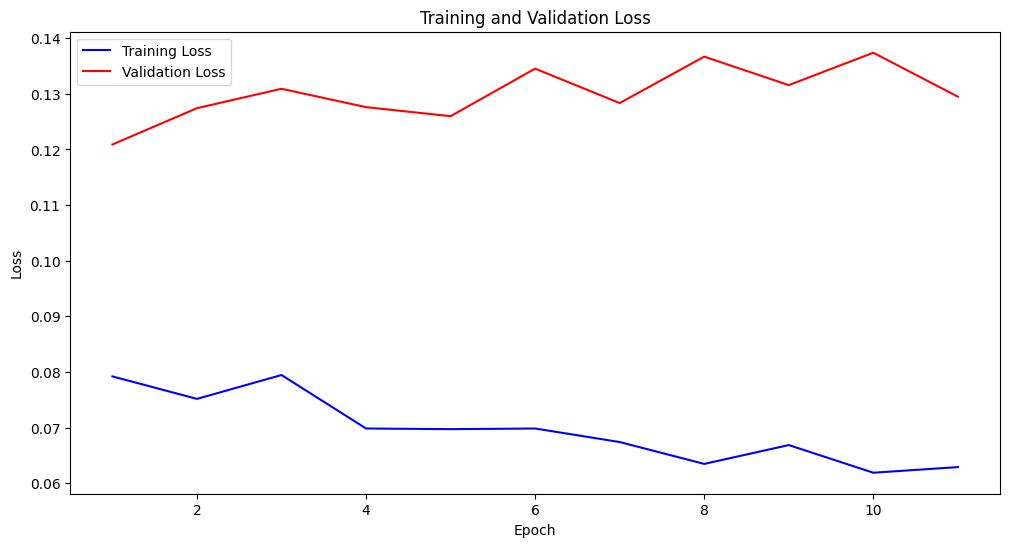

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model and capture the history
history = best_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stopping])

# Extract loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

ValueError: ignored

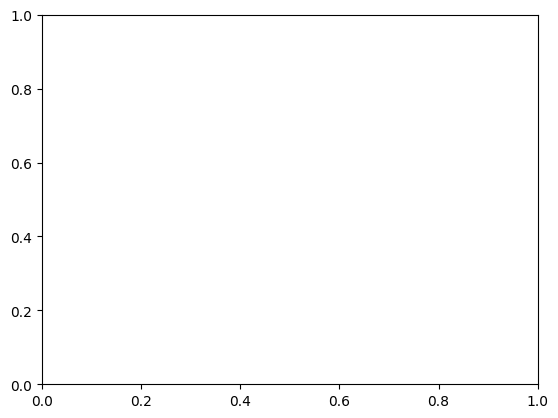

In [48]:
epochs = range(1, 11)  # Adjust based on your number of epochs

# Plot training and validation loss for each fold
for i in range(12):
    plt.plot(epochs, train_losses[i], label=f'Training Loss Fold {i}')
    plt.plot(epochs, val_losses[i], label=f'Validation Loss Fold {i}', linestyle='--')

plt.title('Training and Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()